<a href="https://colab.research.google.com/github/bfatmab/Investigating-Netflix-Movies/blob/main/Investigating_Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
netflix_df=pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [19]:
netflix_subset=netflix_df[netflix_df['type'] == "Movie"]
netflix_subset.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"March 1, 2019",2018,89,This intimate documentary follows rock star Ar...,Documentaries


In [21]:
netflix_movies = netflix_df[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head()

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123


In [22]:
short_movies=netflix_movies[netflix_movies["duration"]<60]
# Inspect the resulting DataFrame
short_movies.head(10)

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
5,46,Turkey,International TV,2016,1
11,1983,Poland,Crime TV,2018,1
12,1994,Mexico,Crime TV,2019,1
16,Feb-09,NaN,International TV,2018,1
24,​SAINT SEIYA: Knights of the Zodiac,Japan,Anime Series,2020,2
26,(Un)Well,United States,Reality TV,2020,1
29,#blackAF,United States,TV Comedies,2020,1
35,#Rucker50,United States,Documentaries,2016,56
38,แผนร้ายนายเจ้าเล่ห์,NaN,International TV,2016,1


In [23]:
# created own colors
genre_colors={"Children":"yellow","Documentaries":"black","Stand-Up":"green","Other":"red"}

colors=[]

for index,row in netflix_movies.iterrows():
    genre = row["genre"]

    # Assign colors based on genre groups
    if genre == "Children":
        colors.append(genre_colors["Children"])
    elif genre == "Documentaries":
        colors.append(genre_colors["Documentaries"])
    elif genre == "Stand-Up":
        colors.append(genre_colors["Stand-Up"])
    else:
        colors.append(genre_colors["Other"])



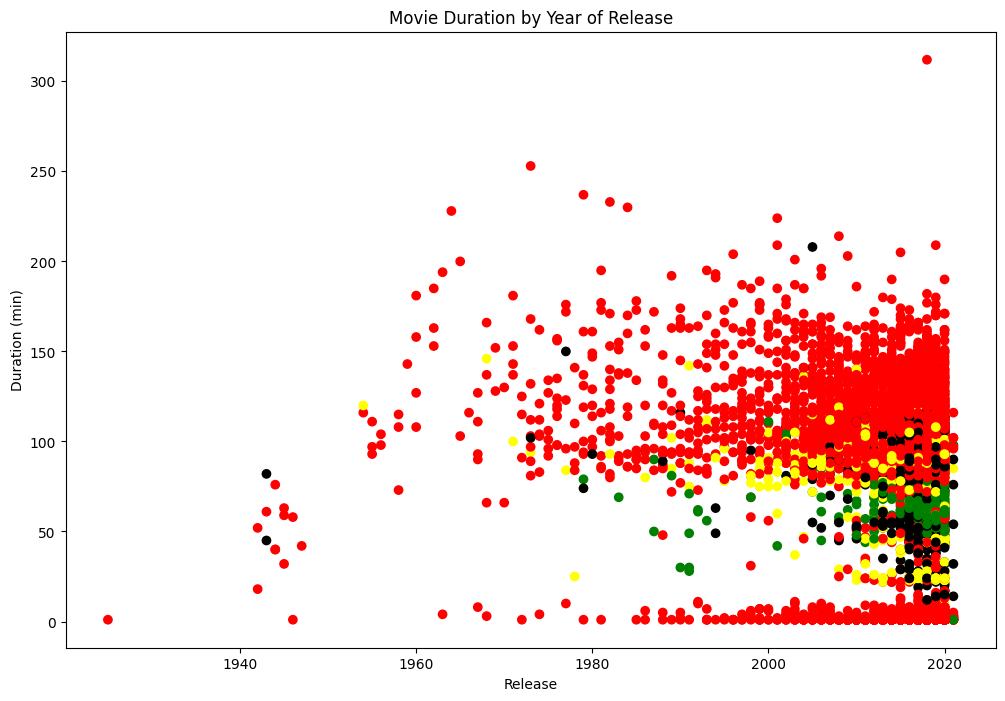

Are we certain that movies are getting shorter?yes


In [27]:
answer="yes"

fig =plt.figure(figsize=(12,8))
plt.scatter(netflix_movies["release_year"],netflix_movies["duration"], c=colors)

plt.xlabel("Release")
plt.ylabel("Duration (min)")

plt.title("Movie Duration by Year of Release")

plt.show()

print("Are we certain that movies are getting shorter?" +  answer)